In [7]:
import sys
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_pickle('../../data/Index Constituents/universe_data.pkl')

In [9]:
df = df.drop(columns = ['P_PRICE_RETURNS(1,0,+24/0/0,USD)'])
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df= df.set_index(['ticker','date'])
test = df.iloc[:,:11]
df=df.join(test.apply(lambda x: x > x.shift()).astype(int),rsuffix = '_c_flag',how='left')
df

,,SP50,R.1000,R.1000G,R.1000V,R.2000,R.2000G,R.2000V,R.3000,R.3000G,R.3000V,...,R.1000_c_flag,R.1000G_c_flag,R.1000V_c_flag,R.2000_c_flag,R.2000G_c_flag,R.2000V_c_flag,R.3000_c_flag,R.3000G_c_flag,R.3000V_c_flag,CRSPTM_c_flag
ticker,date,,,,,,,,,,,,,,,,,,,,,
MCS,2009-12-31,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
CTAS,2009-12-31,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
HAR,2009-12-31,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
BANF,2009-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,1,0,1,0,0,0,0
LANC,2009-12-31,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEAC,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
CBUS,2019-12-31,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,1,1,0,1,1,0,0
APRN,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_plot = df[df['SP50_c_flag']>0][['tret_1mf','tret_3mf','tret_12mf','tret_36mf']].stack().reset_index().rename(columns = {'level_2':'horizon',
0:'ret'})
df_plot

,ticker,date,horizon,ret
0,CTAS,2009-12-31,tret_1mf,-3.68239
1,CTAS,2009-12-31,tret_3mf,9.62793
2,CTAS,2009-12-31,tret_12mf,10.97050
3,CTAS,2009-12-31,tret_36mf,65.13230
4,SCG,2009-12-31,tret_1mf,-5.49363
...,...,...,...,...
195040,PARA,2019-12-31,tret_36mf,-52.91880
195041,WBD,2019-12-31,tret_1mf,-10.62920
195042,WBD,2019-12-31,tret_3mf,-40.62310
195043,WBD,2019-12-31,tret_12mf,-8.09408


<Axes: xlabel='ret', ylabel='horizon'>

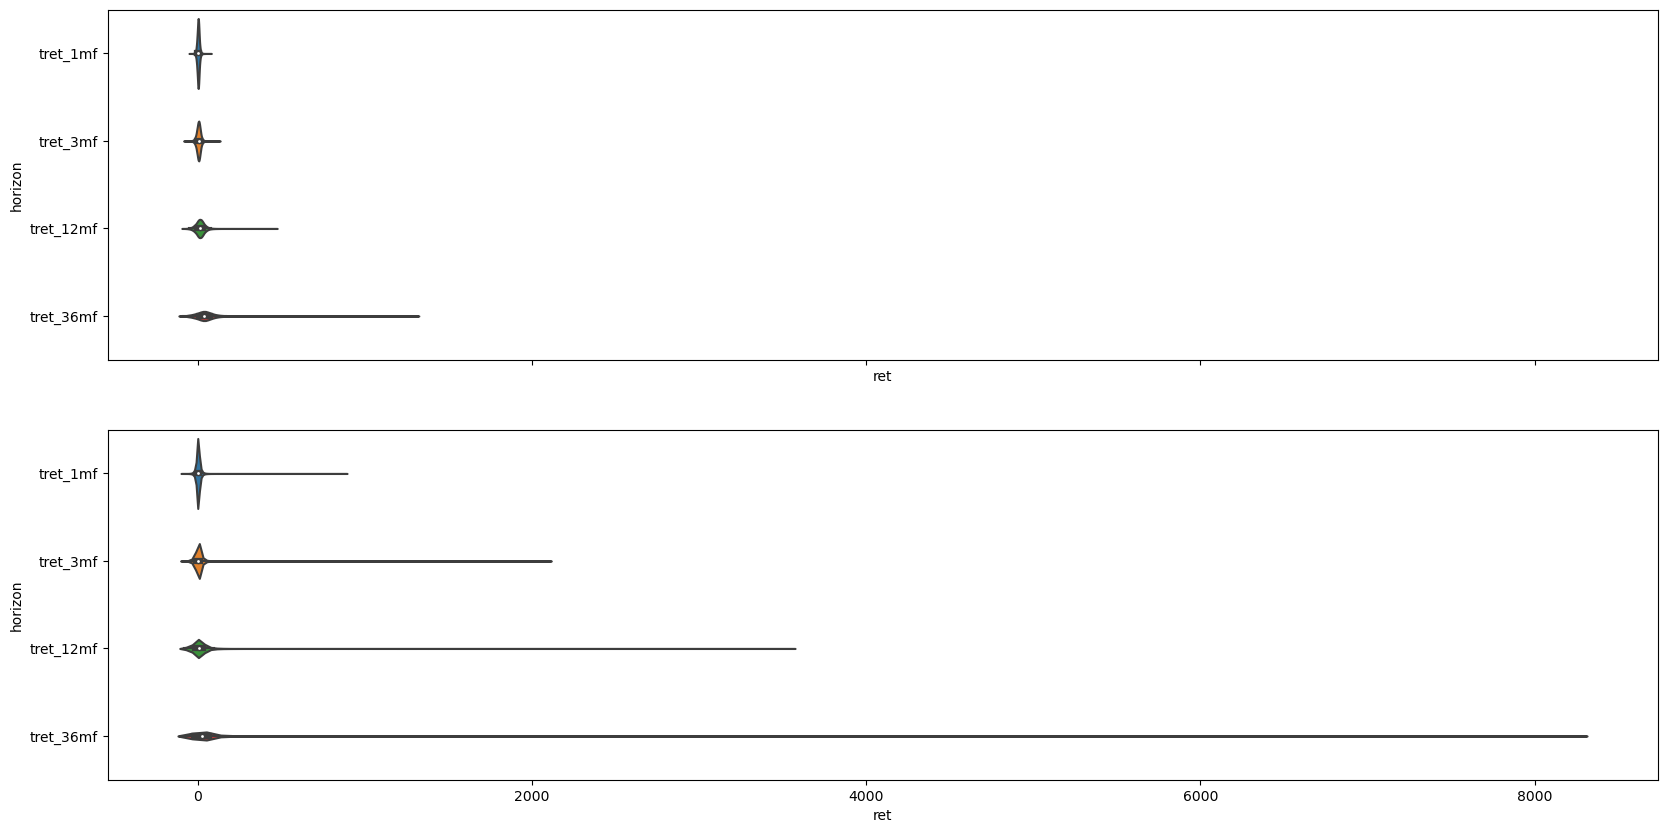

In [11]:
fig,axs = plt.subplots(2,1,figsize = (20,10),sharex=True)
sns.violinplot(data = df_plot,x='ret',orient='h',y='horizon',ax = axs[0])

sns.violinplot(data = df[['tret_1mf','tret_3mf','tret_12mf','tret_36mf']].stack().reset_index().rename(columns = {'level_2':'horizon',
0:'ret'}),x='ret',orient='h',y='horizon',ax = axs[1])

In [12]:
from scipy.stats.mstats import winsorize

In [14]:
dfw = df.copy()
for col in ['tret_1mf','tret_3mf','tret_12mf','tret_36mf']:
    dfw[col]= winsorize(df[col])

dfw

,,SP50,R.1000,R.1000G,R.1000V,R.2000,R.2000G,R.2000V,R.3000,R.3000G,R.3000V,...,R.1000_c_flag,R.1000G_c_flag,R.1000V_c_flag,R.2000_c_flag,R.2000G_c_flag,R.2000V_c_flag,R.3000_c_flag,R.3000G_c_flag,R.3000V_c_flag,CRSPTM_c_flag
ticker,date,,,,,,,,,,,,,,,,,,,,,
MCS,2009-12-31,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
CTAS,2009-12-31,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
HAR,2009-12-31,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
BANF,2009-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,1,0,1,0,0,0,0
LANC,2009-12-31,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEAC,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
CBUS,2019-12-31,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,1,1,0,1,1,0,0
APRN,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


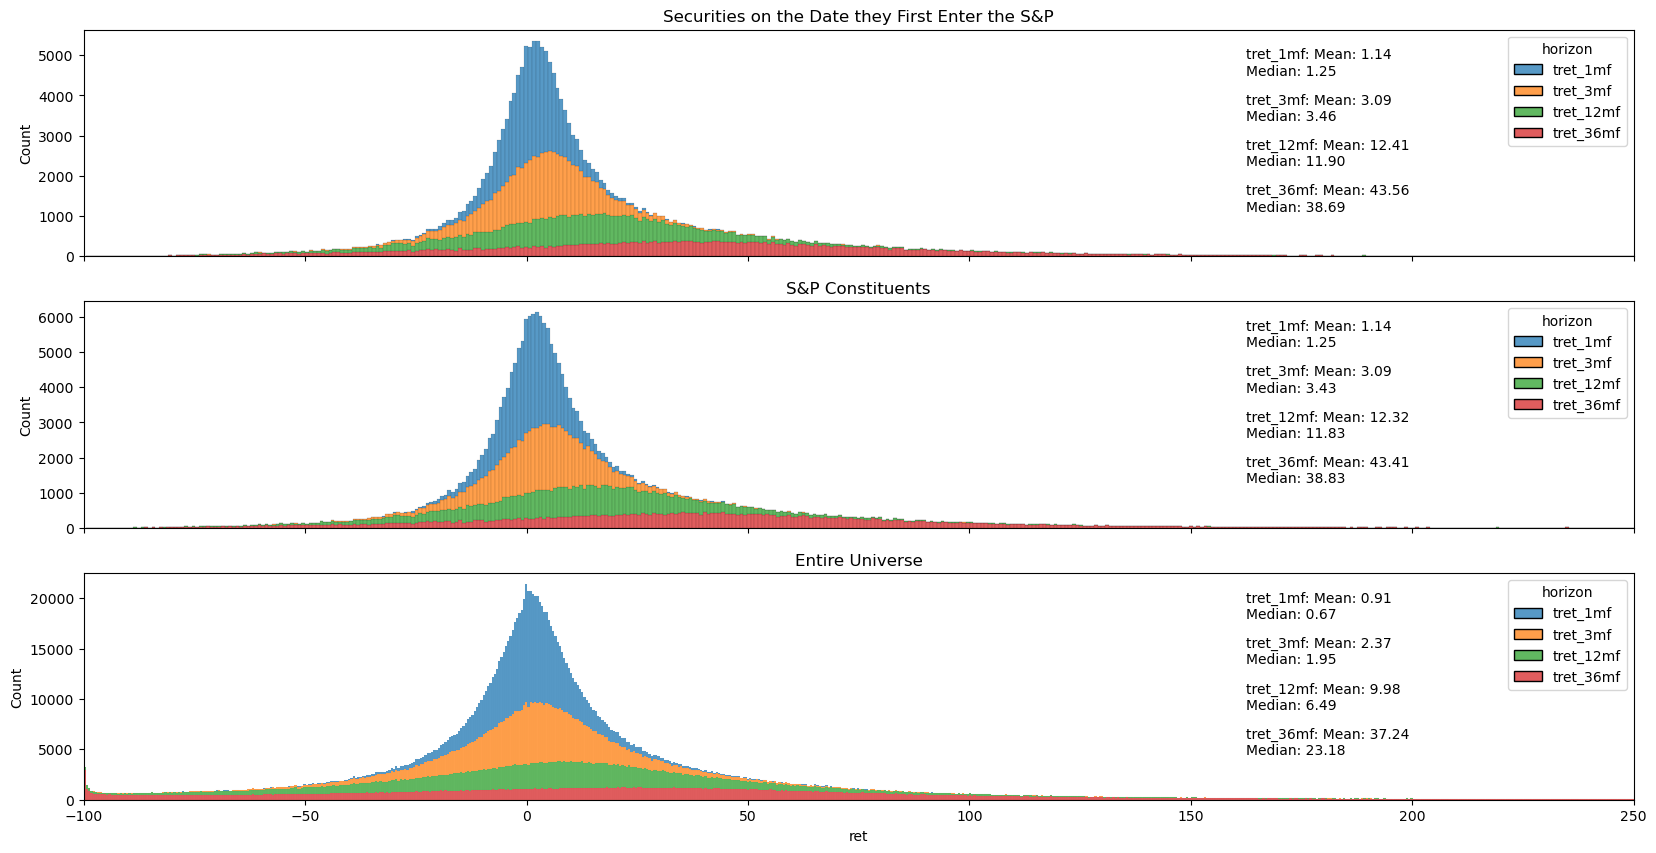

In [62]:
ret_horizons = ['tret_1mf','tret_3mf','tret_12mf','tret_36mf']
df_temp = dfw[dfw['SP50_c_flag']>0][ret_horizons]
df_plot = df_temp.stack().reset_index().rename(columns = {'level_2':'horizon',
0:'ret'})
fig,axs = plt.subplots(3,1,figsize = (20,10),sharex=True)
sns.histplot(data = df_plot,x='ret',hue='horizon',ax = axs[0],multiple="stack")
axs[0].set_title('Securities on the Date they First Enter the S&P')

x=.8
for ret in ret_horizons:
    mean_val = df_temp[ret].mean()
    median_val = df_temp[ret].median()
    axs[0].text(.75,x, f"{ret}: Mean: {mean_val:.2f}\nMedian: {median_val:.2f}", transform=axs[0].transAxes, fontsize=10)
    x-=.2

df_temp = dfw[dfw['SP50']>0][['tret_1mf','tret_3mf','tret_12mf','tret_36mf']]
sns.histplot(data = df_temp.stack().reset_index().rename(columns = {'level_2':'horizon',
0:'ret'}),x='ret',hue='horizon',ax = axs[1],multiple="stack")
axs[1].set_title('S&P Constituents')
x=.8
for ret in ret_horizons:
    mean_val = df_temp[ret].mean()
    median_val = df_temp[ret].median()
    axs[1].text(.75,x, f"{ret}: Mean: {mean_val:.2f}\nMedian: {median_val:.2f}", transform=axs[1].transAxes, fontsize=10)
    x-=.2

df_temp = dfw[['tret_1mf','tret_3mf','tret_12mf','tret_36mf']]
sns.histplot(data = df_temp.stack().reset_index().rename(columns = {'level_2':'horizon',
0:'ret'}),x='ret',hue='horizon',ax = axs[2],multiple="stack")
axs[2].set_title('Entire Universe')
x=.8
for ret in ret_horizons:
    mean_val = df_temp[ret].mean()
    median_val = df_temp[ret].median()
    axs[2].text(.75,x, f"{ret}: Mean: {mean_val:.2f}\nMedian: {median_val:.2f}", transform=axs[2].transAxes, fontsize=10)
    x-=.2


plt.xlim(-100,250)
plt.show()

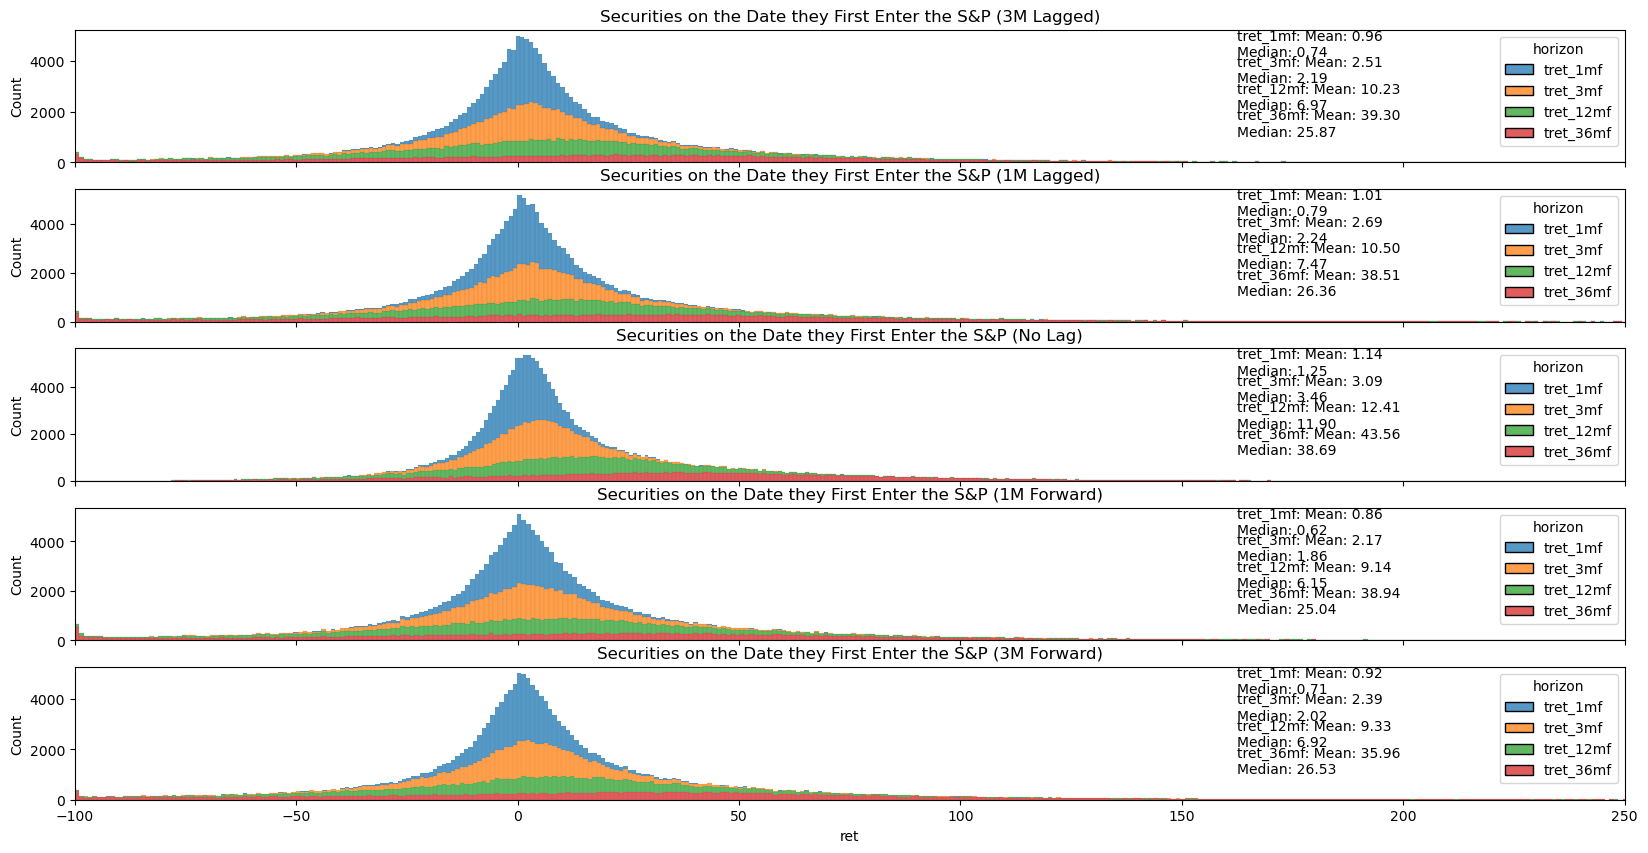

In [66]:
fig,axs = plt.subplots(5,1,figsize = (20,10),sharex=True)

ret_horizons = ['tret_1mf','tret_3mf','tret_12mf','tret_36mf']

#plot 1
df_temp = dfw[dfw['SP50_c_flag'].shift(3)>0][ret_horizons]
df_plot = df_temp.stack().reset_index().rename(columns = {'level_2':'horizon',
0:'ret'})

sns.histplot(data = df_plot,x='ret',hue='horizon',ax = axs[0],multiple="stack")
axs[0].set_title('Securities on the Date they First Enter the S&P (3M Lagged)')

x=.8
for ret in ret_horizons:
    mean_val = df_temp[ret].mean()
    median_val = df_temp[ret].median()
    axs[0].text(.75,x, f"{ret}: Mean: {mean_val:.2f}\nMedian: {median_val:.2f}", transform=axs[0].transAxes, fontsize=10)
    x-=.2

df_temp = dfw[dfw['SP50_c_flag'].shift(1)>0][ret_horizons]
df_plot = df_temp.stack().reset_index().rename(columns = {'level_2':'horizon',
0:'ret'})


#plot 2
sns.histplot(data = df_plot,x='ret',hue='horizon',ax = axs[1],multiple="stack")
axs[1].set_title('Securities on the Date they First Enter the S&P (1M Lagged)')

x=.8
for ret in ret_horizons:
    mean_val = df_temp[ret].mean()
    median_val = df_temp[ret].median()
    axs[1].text(.75,x, f"{ret}: Mean: {mean_val:.2f}\nMedian: {median_val:.2f}", transform=axs[1].transAxes, fontsize=10)
    x-=.2

df_temp = dfw[dfw['SP50_c_flag']>0][ret_horizons]
df_plot = df_temp.stack().reset_index().rename(columns = {'level_2':'horizon',
0:'ret'})


#plot 3
sns.histplot(data = df_plot,x='ret',hue='horizon',ax = axs[2],multiple="stack")
axs[2].set_title('Securities on the Date they First Enter the S&P (No Lag)')

x=.8
for ret in ret_horizons:
    mean_val = df_temp[ret].mean()
    median_val = df_temp[ret].median()
    axs[2].text(.75,x, f"{ret}: Mean: {mean_val:.2f}\nMedian: {median_val:.2f}", transform=axs[2].transAxes, fontsize=10)
    x-=.2


#plot 4
df_temp = dfw[dfw['SP50_c_flag'].shift(-1)>0][ret_horizons]
df_plot = df_temp.stack().reset_index().rename(columns = {'level_2':'horizon',
0:'ret'})

sns.histplot(data = df_plot,x='ret',hue='horizon',ax = axs[3],multiple="stack")
axs[3].set_title('Securities on the Date they First Enter the S&P (1M Forward)')

x=.8
for ret in ret_horizons:
    mean_val = df_temp[ret].mean()
    median_val = df_temp[ret].median()
    axs[3].text(.75,x, f"{ret}: Mean: {mean_val:.2f}\nMedian: {median_val:.2f}", transform=axs[3].transAxes, fontsize=10)
    x-=.2


#plot 5

df_temp = dfw[dfw['SP50_c_flag'].shift(-3)>0][ret_horizons]
df_plot = df_temp.stack().reset_index().rename(columns = {'level_2':'horizon',
0:'ret'})


sns.histplot(data = df_plot,x='ret',hue='horizon',ax = axs[4],multiple="stack")
axs[4].set_title('Securities on the Date they First Enter the S&P (3M Forward)')

x=.8
for ret in ret_horizons:
    mean_val = df_temp[ret].mean()
    median_val = df_temp[ret].median()
    axs[4].text(.75,x, f"{ret}: Mean: {mean_val:.2f}\nMedian: {median_val:.2f}", transform=axs[4].transAxes, fontsize=10)
    x-=.2




plt.xlim(-100,250)
plt.show()

In [74]:
df= df.join(df.iloc[:,-11:].sum(axis=1).apply(lambda x: 1 if x>0 else 0).rename("entry_any_index"))

In [135]:

ret_horizons = ['tret_1mf','tret_3mf','tret_12mf','tret_36mf']
table_df = {}

lags = [-12,-6,-3,-1,0,1,3,6,12]
for ret in ret_horizons:
    for lag in lags:
        df_temp = df[df['entry_any_index'].shift(lag)>0][ret_horizons]
        mean_val = df_temp[ret].mean()
        median_val = df_temp[ret].median()
        table_df[(lag,ret)] = {'mean':mean_val,
        'median':median_val}

df_stats = pd.DataFrame().from_dict(table_df).T

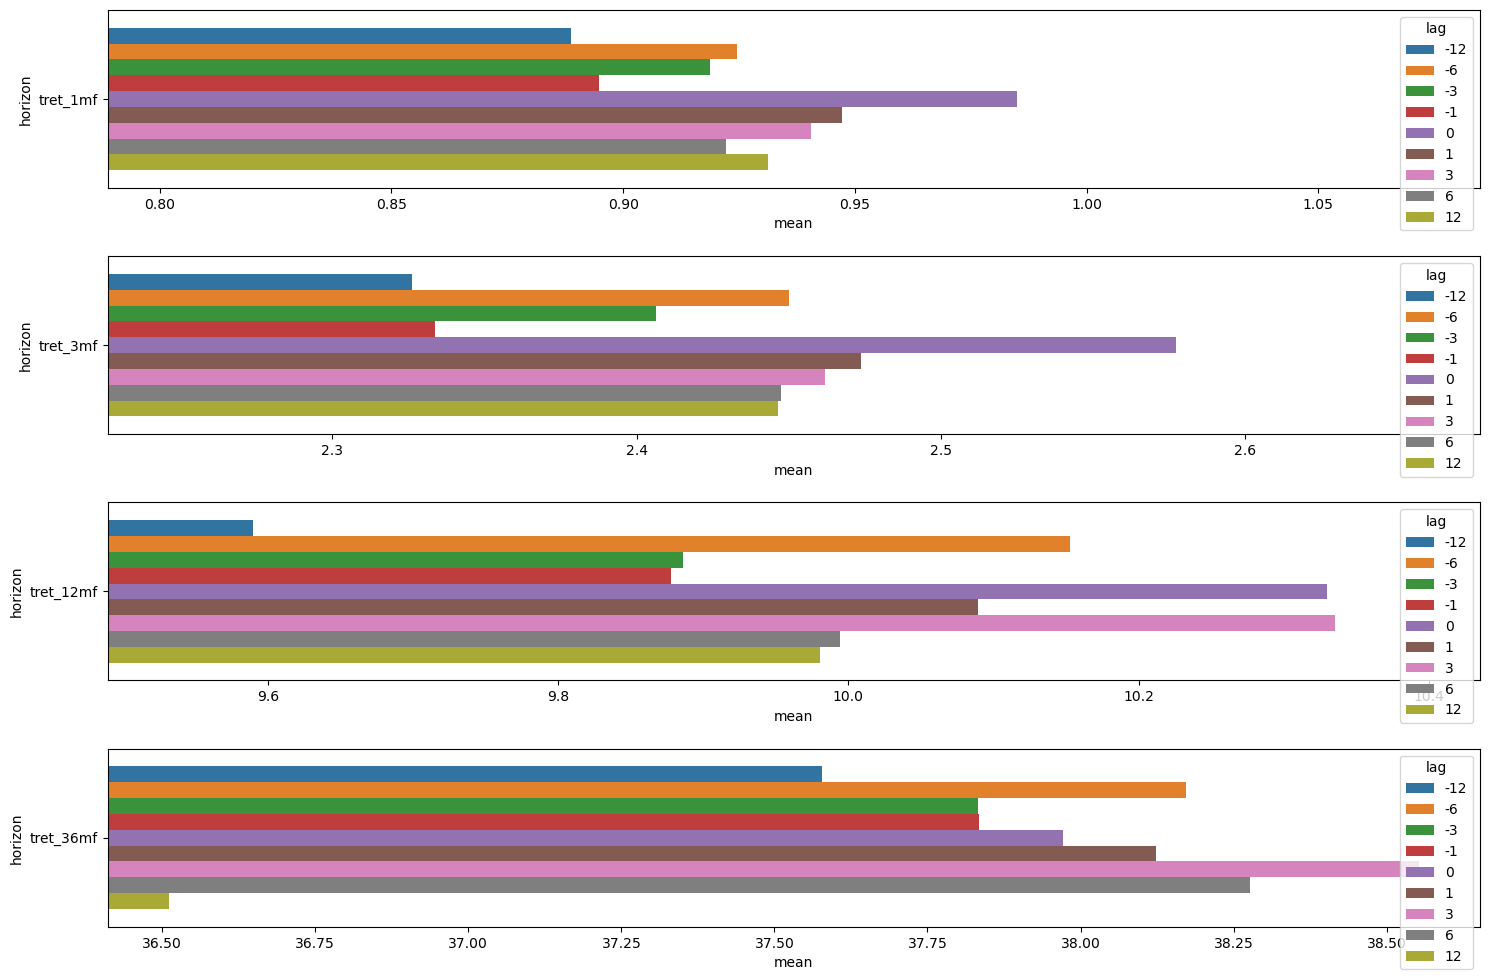

In [138]:
fig,axs = plt.subplots(len(ret_horizons),1,figsize = (15,10))
for ret in enumerate(ret_horizons):
    df_stats_plot = df_stats.reset_index().rename(columns={'level_0':'lag',
    'level_1':'horizon'})
    sns.barplot(data = df_stats_plot[df_stats_plot['horizon']==ret[1]],y='horizon',x='mean',hue='lag',ax=axs[ret[0]])
    axs[ret[0]].set_xlim((df_stats_plot[df_stats_plot['horizon']==ret[1]]['mean'].min()-.1,df_stats_plot[df_stats_plot['horizon']==ret[1]]['mean'].max()+.1))
#
plt.tight_layout()